In [40]:
import requests
import json
import pandas as pd 
import numpy as np 
import math
import os, sys
from scipy.stats import ttest_ind, f_oneway, chi2_contingency,pearsonr
import matplotlib.pyplot as plt 


In [41]:
url = "https://edumail.fr/formations/realtimedata.json"
file_path = r"C:\Users\ouaza\Desktop\Stats\TP\Data\real_time_data.json"

In [42]:
headers = {"User-Agent": "Mozilla/5.0"}
if os.path.exists(file_path):
    print("already exist")
else:
    response = requests.get(url, headers= headers)
    if response.status_code == 200:
        with open(file_path, "w", encoding="utf-8") as f:
            f.write(response.text)
            data = response.json()
            df = pd.DataFrame(data)
        print("Fichier téléchargé et sauvegardé.")
    else:
        print(f"Erreur lors du téléchargement : {response.status_code}")
        


already exist


In [43]:
with open(file_path,'r', encoding = 'utf-8') as f : 
    data = json.load(f)
    
    print(json.dumps(data, indent=4))



{
    "studyCorrelation": [
        {
            "id": 1,
            "hours": 6.96,
            "score": 71
        },
        {
            "id": 2,
            "hours": 3.9,
            "score": 65
        },
        {
            "id": 3,
            "hours": 0.72,
            "score": 81
        },
        {
            "id": 4,
            "hours": 0.36,
            "score": 41
        },
        {
            "id": 5,
            "hours": 2.11,
            "score": 42
        },
        {
            "id": 6,
            "hours": 8.85,
            "score": 93
        },
        {
            "id": 7,
            "hours": 9.79,
            "score": 85
        },
        {
            "id": 8,
            "hours": 9.01,
            "score": 86
        },
        {
            "id": 9,
            "hours": 4.11,
            "score": 64
        },
        {
            "id": 10,
            "hours": 3.14,
            "score": 63
        },
        {
            "id": 11,
          

In [44]:
print(data.keys() if isinstance(data, dict) else type(data))

dict_keys(['studyCorrelation', 'courseFormat', 'midtermScores', 'approachGains', 'completionTimes'])


In [45]:
hours = [item["hours"] for item in data["studyCorrelation"] if "hours" in item]
score = [item["score"] for item in data["studyCorrelation"] if "score" in item]

t_stat, p_value = ttest_ind(hours,score)

In [46]:
len(hours)

10000

In [47]:
t_stat,p_value

(np.float64(-433.1984393964653), np.float64(0.0))

In [48]:

def regression_lineaire(x, y):
    # Calcul des coefficients de la droite de régression
    coef = np.polyfit(x, y, 1)
    a, b = coef
    print(f"y = {a:.3f}x + {b:.3f}")

    # Affichage du nuage de points et de la droite
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, label="Données")
    plt.plot(x, a * np.array(x) + b, color='red', label="Régression linéaire")
    plt.xlabel("Heures d'étude")
    plt.ylabel("Score")
    plt.legend()
    plt.show()
    return a, b

y = 3.045x + 49.278


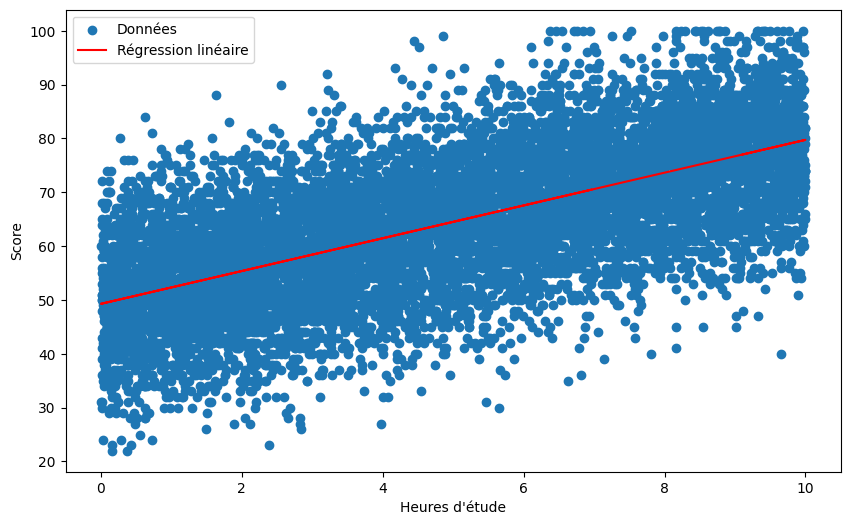

(np.float64(3.044967330561645), np.float64(49.27843725399973))

In [49]:
regression_lineaire(hours,score)

          hours     score
hours  1.000000  0.658305
score  0.658305  1.000000


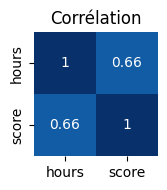

In [39]:

df_sc = pd.DataFrame([
    {k: item[k] for k in ("hours","score") if k in item}
    for item in data.get("studyCorrelation", [])
])

# Garder seulement les lignes complètes
df_sc = df_sc.dropna(subset=["hours","score"])

# Matrice de corrélation (Pearson par défaut)
corr = df_sc.corr(numeric_only=True)
print(corr)

# (Optionnel) affichage rapide style heatmap sans fioritures
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(3,2))
sns.heatmap(corr, annot=True, cmap="Blues", vmin=-1, vmax=1, square=True, cbar=False)
plt.title("Corrélation")
plt.tight_layout()
plt.show()

La regression linéaire permet de visualiser l'impact des heures d'étude par rapport au score la formule de la régression linéaire :  y = 3.045x + 49.278

on a t_test qui est égale à -433.1984393964653 ce qui veut dire qu'il y a clairement une différence significative entre les deux groupes 

on a une p_value qui est égale a 0.0 ce qui veut dire clairement que la différence observée entre les deux groupe est éxtrément significative 

(vu que la p_value = 0 on rejette l'hypothése nulle)




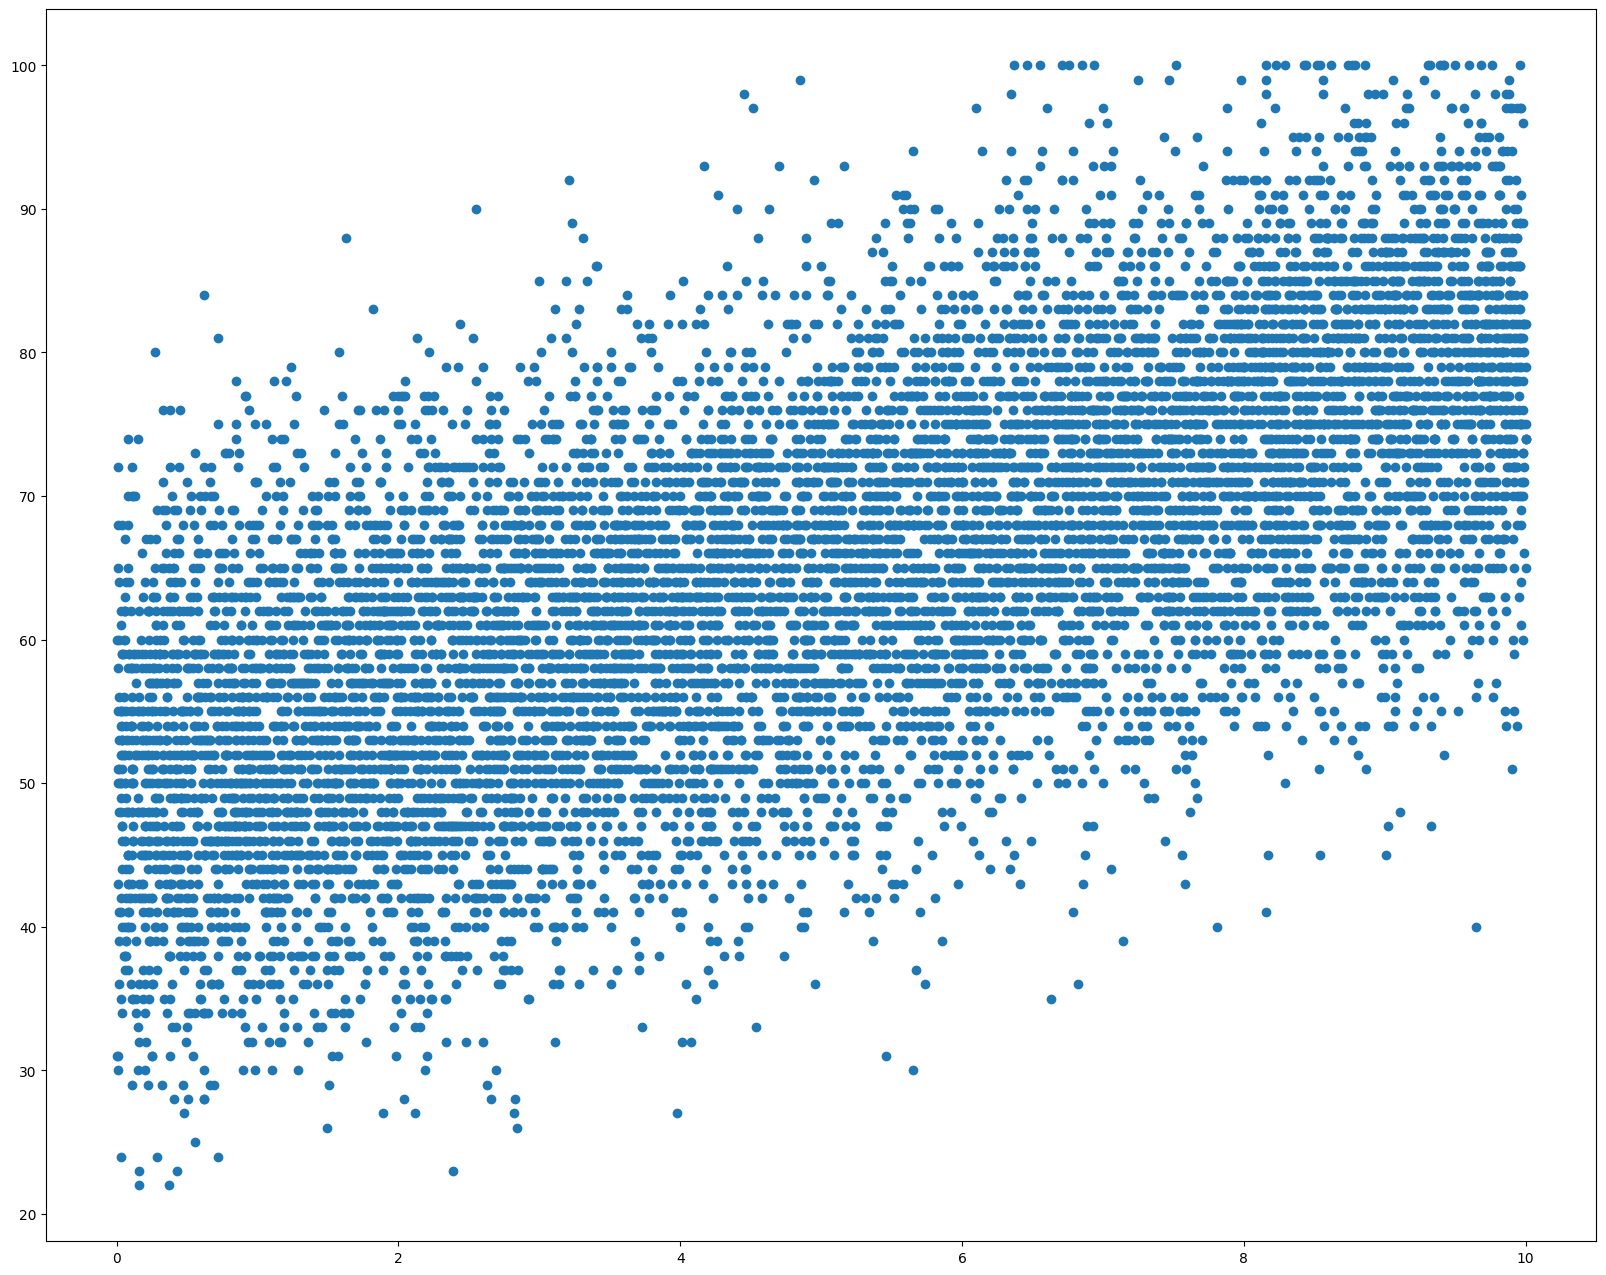

In [15]:
plt.figure(figsize=(20,16))
plt.scatter(hours,score)
plt.show()

In [16]:
class_A = data["midtermScores"]["class_A"]
class_B = data["midtermScores"]["class_B"]

In [17]:
t_test2, p_value2 = ttest_ind(class_A, class_B)


In [18]:
t_test2, p_value2

(np.float64(-0.5662834336698367), np.float64(0.5712074747852376))

l'interprétation

t_test2 = -0.566 (proche de 0)
p_value2 = 0.571 (beaucoup plus grand que 0.05)
Conclusion :

La différence entre les moyennes des deux classes n’est pas significative.
La p-value élevée (> 0.05) indique que la différence observée peut être due au hasard.
On ne peut pas dire qu’une classe a de meilleures notes que l’autre d’un point de vue statistique.

C:\Users\ouaza\AppData\Local\Temp\ipykernel_449024\3344818116.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([class_A, class_B], labels=['Classe A', 'Classe B'])


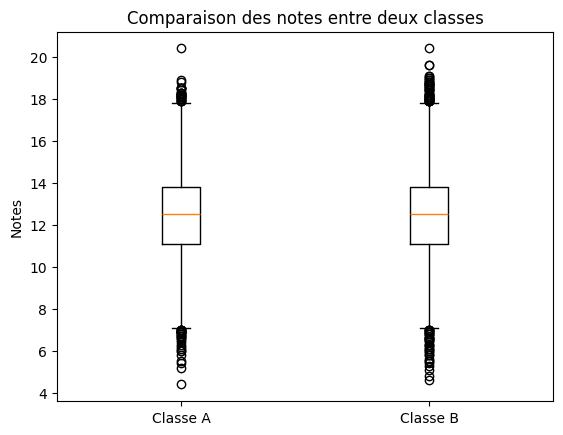

In [19]:
plt.boxplot([class_A, class_B], labels=['Classe A', 'Classe B'])
plt.ylabel('Notes')
plt.title('Comparaison des notes entre deux classes')
plt.show()

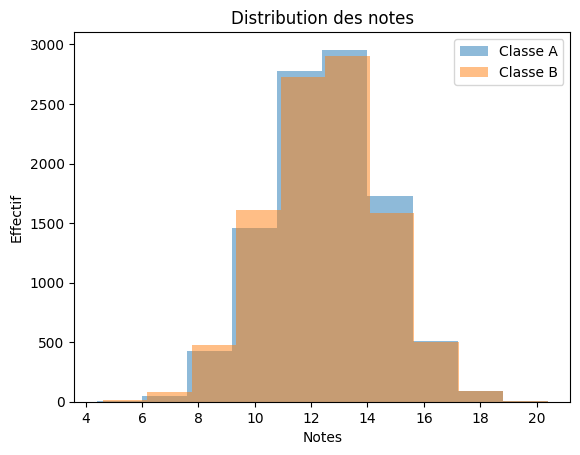

In [20]:
plt.hist(class_A, alpha=0.5, label='Classe A')
plt.hist(class_B, alpha=0.5, label='Classe B')
plt.xlabel('Notes')
plt.ylabel('Effectif')
plt.legend()
plt.title('Distribution des notes')
plt.show()

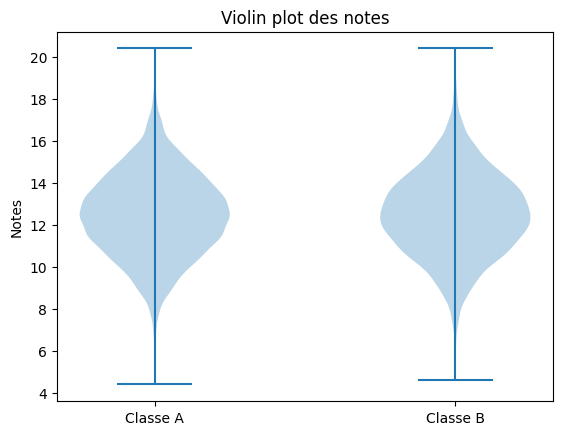

In [21]:
plt.violinplot([class_A, class_B])
plt.xticks([1, 2], ['Classe A', 'Classe B'])
plt.ylabel('Notes')
plt.title('Violin plot des notes')
plt.show()

In [22]:
test2 = [item["Approach1"] for item in data["approachGains"] if isinstance(item, dict) and "Approach1" in item]




On pose l'hypothése H0 (Hypothése nulle )= la moyenne des notes des deux classes sont égales 

H1 (Hypothése alternative) = les deux moyennes ne sont pas équivalantes 

In [23]:
class_A = data["midtermScores"]["class_A"]
class_B = data["midtermScores"]["class_B"]

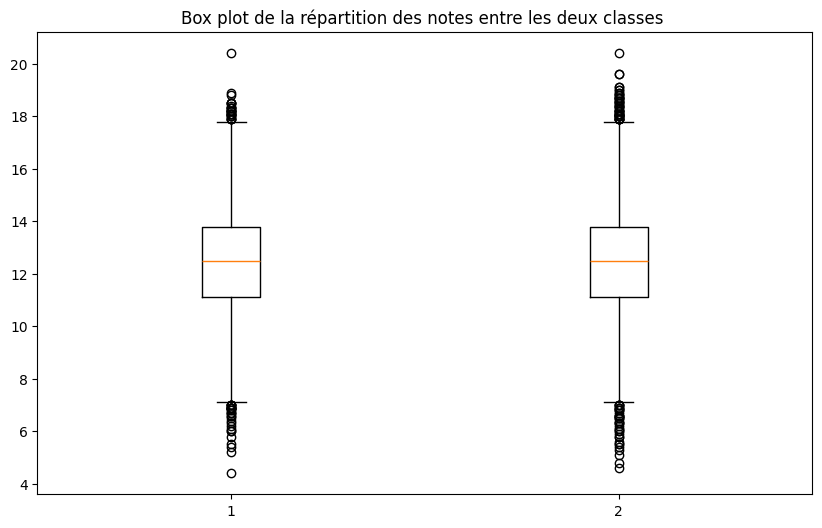

In [24]:
plt.figure(figsize=(10,6))
plt.boxplot([class_A, class_B], label=["Resultat de la classe A ", "Resultat de la classe B "])
plt.title("Box plot de la répartition des notes entre les deux classes ")
plt.show()

In [25]:
# General results between two classes using the anova test 

f_statistic, p_value = f_oneway(class_A, class_B)

In [26]:
f_statistic, p_value

(np.float64(0.3206769272488691), np.float64(0.5712074747893714))

Interprétation des résultat 

On obtient une p_value qui est égale à 0.5712074747893714 on déduit que les résultats ne sont pas statistiquement significatifs et

f_statistic qui égale a 0.3206769272488691 ce qui indique que la variance entre les deux groupes est trés faibles ce qui veut dire que les deux groupes sont assez similaire


On pose H0 (Hypothése nulle) : toutes les moyennes des 4 approches pédagogiques sont équivalantes 

On pose H1 (Hypothése alternative) : il existe une moyenne parmis les 4 qui n'est pas égale aux autres 

In [27]:
approach_1 = data["approachGains"]["Approach1"]
approach_2 = data["approachGains"]["Approach2"]
approach_3 = data["approachGains"]["Approach3"]
approach_4 = data["approachGains"]["Approach4"]

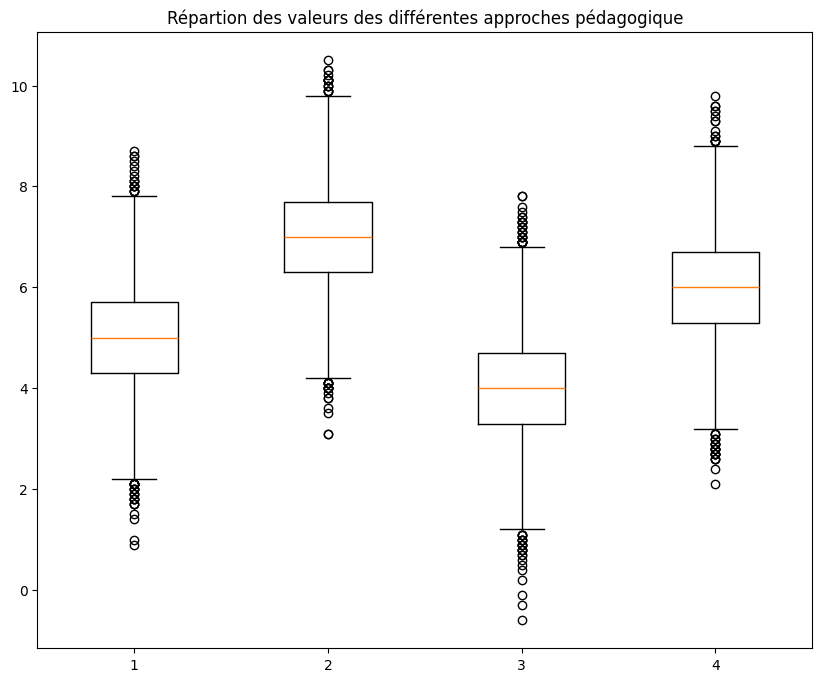

In [28]:
plt.figure(figsize=(10,8))
plt.boxplot([approach_1,approach_2,approach_3,approach_4],label=("approche 1 ", "approche 2", "approche 3", "approche 4 "))
plt.title("Répartion des valeurs des différentes approches pédagogique")
plt.show()

In [29]:
f_statistic_approach , p_value_approach = f_oneway(approach_1, approach_2, approach_3, approach_4)
f_statistic_approach, p_value_approach

(np.float64(16580.41361292541), np.float64(0.0))

Interprétation des résultats 

On obtient une p_value qui est égale à 0.0, donc p_value < 0.05 ce qui démontre qu'il existe une différence significative parmi les groupes 

et f_statistic  qui est égale à 16580.41361292541 ce qui démontre que la variance entre les 4 groupes est assez conséquante 

completionTimes

In [30]:
completionTimes = data["completionTimes"]
None_ = data["completionTimes"]["None"]
simple = data["completionTimes"]["Simple"]
advanced = data["completionTimes"]["Advanced"]




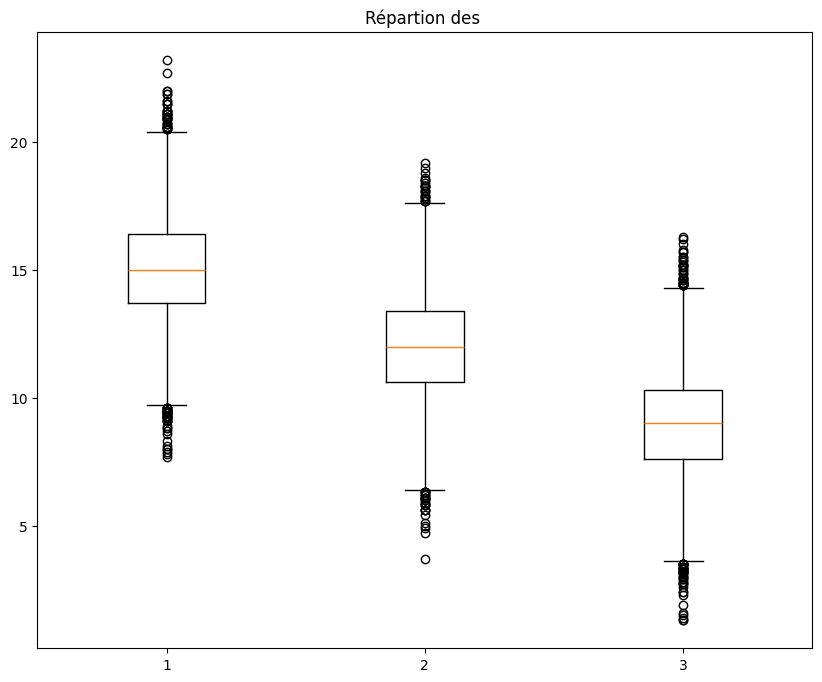

In [31]:
plt.figure(figsize=(10,8))
plt.boxplot([None_,simple,advanced])
plt.title("Répartion des ")
plt.show()

In [32]:
presentiel = list(data["courseFormat"]["presentiel"].values())
distanciel = list( data["courseFormat"]["distanciel"].values())

x = [presentiel,distanciel]
prez_pass = x[0][0]
prez_fail = x[0][1]
dist_pass = x[1][0]
dist_fail = x[1][1]


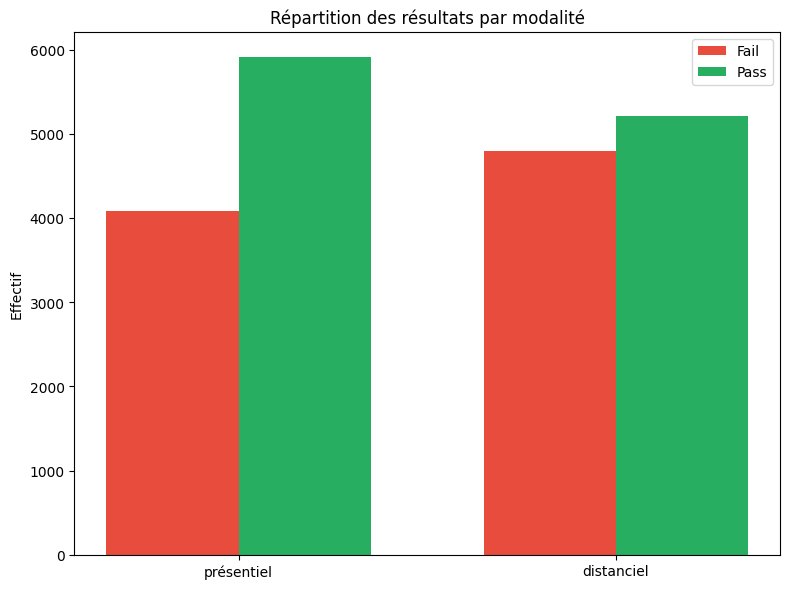

In [33]:
import numpy as np

labels = ['présentiel', 'distanciel']  # adapte selon tes groupes
fail = [prez_fail, dist_fail]   # effectifs fail pour chaque groupe
pass_ = [prez_pass, dist_pass]  # effectifs pass pour chaque groupe

x = np.arange(len(labels))  # positions des groupes
width = 0.35  # largeur des barres

plt.figure(figsize=(8, 6))
plt.bar(x - width/2, fail, width, label='Fail', color='#e74c3c')
plt.bar(x + width/2, pass_, width, label='Pass', color='#27ae60')

plt.xticks(x, labels)
plt.ylabel('Effectif')
plt.title('Répartition des résultats par modalité')
plt.legend()
plt.tight_layout()
plt.show()

In [34]:
table = np.array([[prez_pass,prez_fail],[dist_pass,dist_fail]])

In [35]:
stat, p_value_chi2, dof, expected = chi2_contingency(table)
stat,p_value_chi2,dof, expected
print("Statistique chi2", stat)
print("p_value", p_value_chi2)
print("Degrée de liberté",dof)
print("Effectifs attendus",expected)

Statistique chi2 100.39380914701692
p_value 1.2491793526438817e-23
Degrée de liberté 1
Effectifs attendus [[5562.5 4437.5]
 [5562.5 4437.5]]


In [36]:
import numpy as np
from scipy.stats import chi2_contingency

# Supposons que tu as les effectifs suivants pour chaque groupe
# Remplace par tes vraies valeurs
# prez_pass, prez_fail, dist_pass, dist_fail

# Création du tableau de contingence
#           Pass   Fail
# Présentiel   a      b
# Distanciel   c      d

table = np.array([
    [prez_pass, prez_fail],
    [dist_pass, dist_fail]
])

# Test du chi2
chi2, p, dof, expected = chi2_contingency(table)

print("Statistique du chi2 :", chi2)
print("p-value :", p)
print("Degrés de liberté :", dof)
print("Effectifs attendus :\n", expected)

Statistique du chi2 : 100.39380914701692
p-value : 1.2491793526438817e-23
Degrés de liberté : 1
Effectifs attendus :
 [[5562.5 4437.5]
 [5562.5 4437.5]]


Statistique du chi2 : 100.39
Plus cette valeur est grande, plus il y a de différence entre les effectifs observés et attendus.

p-value : 1.25e-23
Cette valeur est extrêmement petite (bien inférieure à 0.05).
Conclusion : il existe une association très significative entre les deux variables (modalité et réussite/échec).
On rejette l’hypothèse nulle d’indépendance.

Degrés de liberté : 1
Normal pour un tableau 2x2.

Effectifs attendus
Ce sont les effectifs que tu aurais si les deux variables étaient indépendantes.
Ici, ils sont identiques pour chaque groupe, donc la différence observée est très marquée.